In [7]:
# ячейка импортов

import numpy as np
import pandas as pd

# импорт моделей
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report # табличка с метриками

import matplotlib.pyplot as plt
from collections import Counter

# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline

Exploratory Data Analysis (EDA)

In [8]:

! unzip 'https://drive.google.com/file/d/1U6gyvz8u98hszceR4w-E1qDN6VLLsJWO/view?usp=sharing'

unzip:  cannot find or open https://drive.google.com/file/d/1U6gyvz8u98hszceR4w-E1qDN6VLLsJWO/view?usp=sharing, https://drive.google.com/file/d/1U6gyvz8u98hszceR4w-E1qDN6VLLsJWO/view?usp=sharing.zip or https://drive.google.com/file/d/1U6gyvz8u98hszceR4w-E1qDN6VLLsJWO/view?usp=sharing.ZIP.

No zipfiles found.


In [18]:
! unzip "https://github.com/nstsj/ML_for_NLP/blob/3c605d46007ec7f7171d620b5b160e3bcd3e37a0/HW/news_fake-n-true.csv.zip"

unzip:  cannot find or open https://github.com/nstsj/ML_for_NLP/blob/3c605d46007ec7f7171d620b5b160e3bcd3e37a0/HW/news_fake-n-true.csv.zip, https://github.com/nstsj/ML_for_NLP/blob/3c605d46007ec7f7171d620b5b160e3bcd3e37a0/HW/news_fake-n-true.csv.zip.zip or https://github.com/nstsj/ML_for_NLP/blob/3c605d46007ec7f7171d620b5b160e3bcd3e37a0/HW/news_fake-n-true.csv.zip.ZIP.


In [16]:
data = pd.read_csv("https://drive.google.com/file/d/1Y-yMCnhbAAEkKl8Ng1KOnPEsVVz3ZD-w/view?usp=sharing")
data.head(4)

ParserError: ignored

Способ из инета импорт с диска GoogleDrive

In [4]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [30]:
link = 'https://drive.google.com/file/d/1Y-yMCnhbAAEkKl8Ng1KOnPEsVVz3ZD-w/view?usp=sharing'

In [31]:
data = pd.read_csv('https://drive.google.com/file/d/1Y-yMCnhbAAEkKl8Ng1KOnPEsVVz3ZD-w/view?usp=sharing')

ParserError: ignored

In [24]:
fluff, id = link.split('=') 
print(id) # Verify that you have everything after '=' 

sharing


In [26]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('news_fake-n-true.csv')  
df3 = pd.read_csv('news_fake-n-true.csv')# Dataset is now stored in a Pandas Dataframe

ApiRequestError: ignored

Загрузить через авторизацию на GoogleDrive не удалось.
Пробую еще один способ - загрузить с локального диска


In [5]:
from google.colab import files
uploaded = files.upload()

Saving news_fake-n-true.csv to news_fake-n-true.csv


In [6]:
import iodf2 = pd.read_csv(io.BytesIO(uploaded['news_fake-n-true.csv']))# Dataset is now stored in a Pandas Dataframe

SyntaxError: ignored

Не удалось. Еще раз попробую загрузить в файлы колаба. Одно, что очень сильно беспокоит, что файл может исчезнуть после окончания сессии. И как тогда быть?


In [9]:
data = pd.read_csv('/content/news_fake-n-true.csv')
data.head(4)


,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


# Новый раздел

# Новый раздел

колонка label отвечает за тип новости: настоящие имеют лейбл 1, фейковые новости -- с лейблом 0

In [10]:
# создадим новый датафрейм из старого

data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)


display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


распределение настоящих и фейковых новостей примерно равное

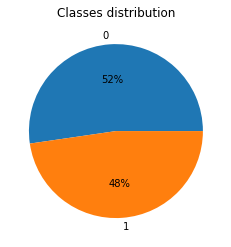

In [11]:
classes =pd.value_counts(data_clean["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

давайте попробуем предсказать: окажется ли текст настоящей новостью или фейковой

Векторизуйте тексты
Разделите данные на обучающую и тестовую выборку
Попробуйте обучить разные модели для классификации на данных

Naive Bayes
SVM
Decision Trees
Random Forest
Boosting
Для каждой модели посмотрите на метрики с помощью функции classification report.

Какая/какие модель/ли справляются с задачей наиболее эффективно?

In [12]:
! pip3 list
! pip3 install sklearn

Package                       Version            
----------------------------- -------------------
absl-py                       0.12.0             
alabaster                     0.7.12             
albumentations                0.1.12             
altair                        4.1.0              
appdirs                       1.4.4              
argon2-cffi                   20.1.0             
arviz                         0.11.2             
astor                         0.8.1              
astropy                       4.2.1              
astunparse                    1.6.3              
async-generator               1.10               
atari-py                      0.2.9              
atomicwrites                  1.4.0              
attrs                         21.2.0             
audioread                     2.1.9              
autograd                      1.3                
Babel                         2.9.1              
backcall                      0.2.0              


Наивный Байес

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

# from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [14]:
Counter(" ".join(data_clean[data_clean['label']=='1']["text"]).split()).most_common(50) 


[]

In [15]:
# 30 самых частотных в true
count1 = Counter(" ".join(data_clean[data_clean['label']=='1']["text"]).lower().split()).most_common(30) 
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in true", 1 : "count"})

# то же для false
count2 = Counter(" ".join(data_clean[data_clean['label']=='0']["text"]).lower().split()).most_common(30)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in false", 1 : "count"})

display(df1,df2)

""


""


In [16]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')

In [17]:
data_clean["text"]

0        (Reuters) - The story “Trump son-in-law Jared ...
1        WASHINGTON (Reuters) - Republican presidential...
2        If America is going to end the day Donald Trum...
3        WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...
4        Well, it seems that despite the efforts of not...
                               ...                        
44893    Donald Trump s economic proposals would be dis...
44894    INDIANAPOLIS (Reuters) - President Donald Trum...
44895    During a private meeting of the most senior Re...
44896    AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...
44897    BEIRUT (Reuters) - Lebanese President Michel A...
Name: text, Length: 44898, dtype: object

Жалуется:
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-14-e80a47cf6eb0> in <module>()
----> 1 from sklearn.cross_validation import train_test_split
      2 from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

---------------------------------------------------------------------------
NOTE: If your import is failing due to a missing package, you can
manually install dependencies using either !pip or !apt.

To view examples of installing some common dependencies, click the
"Open Examples" button below.



*Решила переустановить версию 0.23.1 of scikit-learn*

In [18]:
pip install -U "scikit-learn==0.23.1"

Requirement already up-to-date: scikit-learn==0.23.1 in /usr/local/lib/python3.7/dist-packages (0.23.1)


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X = f.fit_transform(data_clean["text"])

display(X.shape)
display(X.toarray())

(44898, 121690)

На этом этапе происходит сбой сеанса и все ячейки переходят в статус невыполненных. Не знаю, с чем это может быть связано. К сожалению, сделать ДЗ я, по-видимому, не смогу.

In [1]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data_clean['label'], 
                                                                    test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)
sum(y_test == 1)

NameError: ignored